Name: Saleh Abdallah

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Data Preparation and Exploration

In [ ]:
# Load MNIST dataset
df = load_digits()

In [ ]:
# Flattened image vectors
X = df.data       
y = df.target     

In [46]:
# Normalize the images
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Show shape and label distribution
print(f'Shape of X: {X_scaled.shape}')
print(f'Shape of y: {y.shape}')
print(pd.Series(y).value_counts().sort_index())

Shape of X: (1797, 64)
Shape of y: (1797,)
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


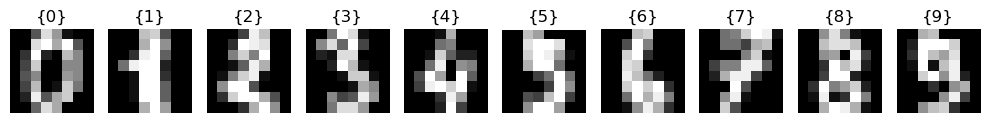

In [49]:
# Visualize sample images with labels
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(df.images[i], cmap='gray')
    ax.set_title({df.target[i]})
    ax.axis('off')
plt.tight_layout()
plt.show()

Clustering

In [77]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
X_clustered = kmeans.fit(X_scaled)

# Get predicted cluster labels
cluster_labels = kmeans.labels_

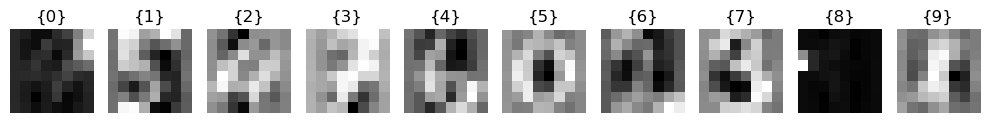

In [80]:
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap='gray')
    ax.set_title({df.target[i]})
    ax.axis('off')
plt.tight_layout()
plt.show()

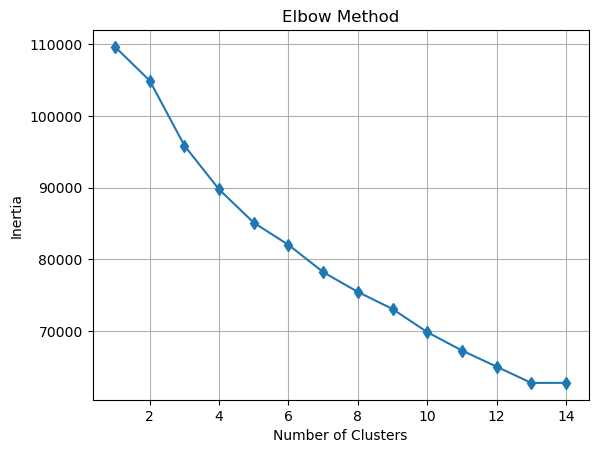

In [74]:
# Elbow Method 
inertia = []
k_range = range(1, 15)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot Elbow Method 
plt.plot(k_range, inertia, marker='d')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Model Evaluation and Prediction

In [ ]:
# Predict cluster for new image data
sample_index_list = [40, 37, 100 , 50, 88]
sample_image = X_scaled[sample_index_list]
predicted_cluster = kmeans.predict(sample_image)

for i, index in enumerate(sample_index_list):
    print(f"Sample index {index} is assigned to cluster: {predicted_cluster[i]}")


Sample index 40 is assigned to cluster: 9
Sample index 37 is assigned to cluster: 7
Sample index 100 is assigned to cluster: 2
Sample index 50 is assigned to cluster: 9
Sample index 88 is assigned to cluster: 4


Dimensionality Reduction and Visualization

In [69]:
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

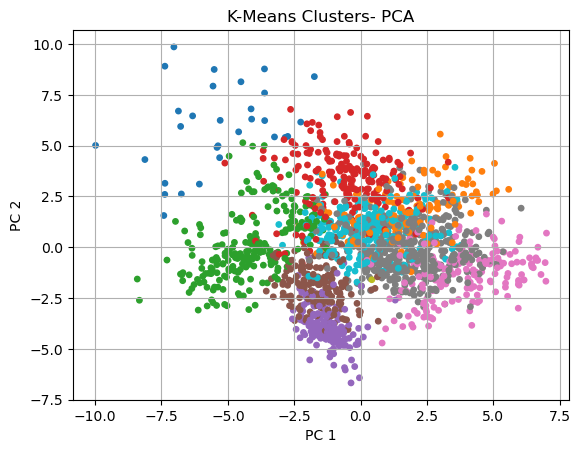

In [70]:
# PCA Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=15)
plt.title('K-Means Clusters- PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

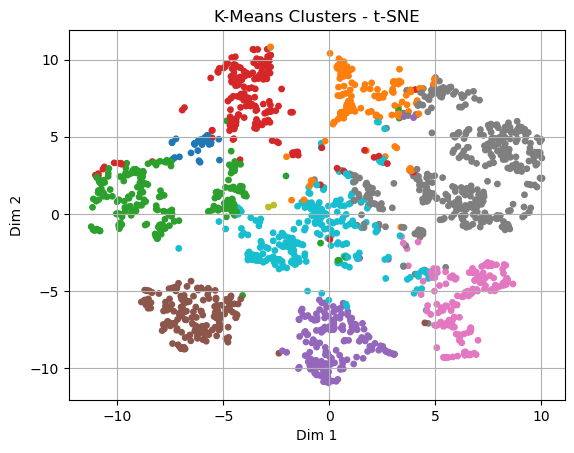

In [59]:
# t-SNE Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=15)
plt.title('K-Means Clusters - t-SNE')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

Reporting and Documentation

* Data normalization was applied using StandardScaler
* KMeans clustering was applied with n_clusters=10
* Elbow Method was used to confirm optimal number of clusters
* Predicted sample images into assigned clusters
* Applied dimensionality reduction using PCA and t-SNE 

Results & Findings:

* KMeans grouped the digits into clusters
* PCA and t-SNE plots showed a clear separation between the digit groups
